In [1]:
import torch
import torchvision
import torchvision.transforms as transforms

In [2]:
transform = transforms.Compose(
    [transforms.ToTensor(),
     transforms.Normalize((0.5, 0.5, 0.5), (0.5, 0.5, 0.5))])

batch_size = 4

trainset = torchvision.datasets.CIFAR10(root='./data', train=True,
                                        download=True, transform=transform)
trainloader = torch.utils.data.DataLoader(trainset, batch_size=batch_size,
                                          shuffle=True, num_workers=2)

testset = torchvision.datasets.CIFAR10(root='./data', train=False,
                                       download=True, transform=transform)
testloader = torch.utils.data.DataLoader(testset, batch_size=batch_size,
                                         shuffle=False, num_workers=2)

classes = ('plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck')

Files already downloaded and verified
Files already downloaded and verified


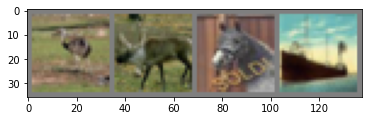

bird  deer  horse ship 


In [3]:
import matplotlib.pyplot as plt
import numpy as np

# functions to show an image


def imshow(img):
    img = img / 2 + 0.5     # unnormalize
    npimg = img.numpy()
    plt.imshow(np.transpose(npimg, (1, 2, 0)))
    plt.show()


# get some random training images
dataiter = iter(trainloader)
images, labels = dataiter.next()

# show images
imshow(torchvision.utils.make_grid(images))
# print labels
print(' '.join(f'{classes[labels[j]]:5s}' for j in range(batch_size)))

In [4]:
import torch.nn as nn
import torch.nn.functional as F


class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 5 * 5, 120)
        self.fc2 = nn.Linear(120, 84)
        self.fc3 = nn.Linear(84, 10)

    def forward(self, x):
        x = self.pool(F.relu(self.conv1(x)))
        x = self.pool(F.relu(self.conv2(x)))
        x = torch.flatten(x, 1) # flatten all dimensions except batch
        x = F.relu(self.fc1(x))
        x = F.relu(self.fc2(x))
        x = self.fc3(x)
        return x
    def forward1(self, x1):
        x1 = self.pool(F.sigmoid(self.conv1(x1)))
        x1 = self.pool(F.sigmoid(self.conv2(x1)))
        x1 = torch.flatten(x, 1) # flatten all dimensions except batch
        x1 = F.sigmoid(self.fc1(x1))
        x1 = F.sigmoid(self.fc2(x1))
        x1 = self.fc3(x1)
        return x1

    def backprop(self, x, y):
        """Return a tuple "(nabla_b, nabla_w)" representing the
        gradient for the cost function C_x.  "nabla_b" and
        "nabla_w" are layer-by-layer lists of numpy arrays, similar
        to "self.biases" and "self.weights"."""
        nabla_b = [np.zeros(b.shape) for b in self.biases]
        nabla_w = [np.zeros(w.shape) for w in self.weights]
        # feedforward
        activation = x
        activations = [x] # list to store all the activations, layer by layer
        zs = [] # list to store all the z vectors, layer by layer
        for b, w in zip(self.biases, self.weights):
            z = np.dot(w, activation)+b
            zs.append(z)
            activation = sigmoid(z)
            activations.append(activation)
        # backward pass
        delta = self.cost_derivative(activations[-1], y) * \
            sigmoid_prime(zs[-1])
        nabla_b[-1] = delta
        nabla_w[-1] = np.dot(delta, activations[-2].transpose())
        # Note that the variable l in the loop below is used a little
        # differently to the notation in Chapter 2 of the book.  Here,
        # l = 1 means the last layer of neurons, l = 2 is the
        # second-last layer, and so on.  It's a renumbering of the
        # scheme in the book, used here to take advantage of the fact
        # that Python can use negative indices in lists.
        for l in xrange(2, self.num_layers):
            z = zs[-l]
            sp = sigmoid_prime(z)
            delta = np.dot(self.weights[-l+1].transpose(), delta) * sp
            nabla_b[-l] = delta
            nabla_w[-l] = np.dot(delta, activations[-l-1].transpose())
        return (nabla_b, nabla_w)

...

def sigmoid(z):
    return 1.0/(1.0+np.exp(-z))

def sigmoid_prime(z):
    return sigmoid(z)*(1-sigmoid(z))

def feedforward(self, a):
        """Return the output of the network if "a" is input."""
        for b, w in zip(self.biases, self.weights):
            a = sigmoid(np.dot(w, a)+b)
        return a


net = Net()

In [5]:
import torch.optim as optim

criterion = nn.CrossEntropyLoss()
optimizer = optim.SGD(net.parameters(), lr=0.001, momentum=0.9)


In [6]:
for epoch in range(2):  # loop over the dataset multiple times

    running_loss = 0.0
    for i, data in enumerate(trainloader, 0):
        # get the inputs; data is a list of [inputs, labels]
        inputs, labels = data

        # zero the parameter gradients
        optimizer.zero_grad()

        # forward + backward + optimize
        outputs = net(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        # print statistics
        running_loss += loss.item()
        if i % 2000 == 1999:    # print every 2000 mini-batches
            print(f'[{epoch + 1}, {i + 1:5d}] loss: {running_loss / 2000:.3f}')
            running_loss = 0.0

print('Finished Training')

[1,  2000] loss: 2.174
[1,  4000] loss: 1.810
[1,  6000] loss: 1.656
[1,  8000] loss: 1.581
[1, 10000] loss: 1.525
[1, 12000] loss: 1.469
[2,  2000] loss: 1.415
[2,  4000] loss: 1.372
[2,  6000] loss: 1.350
[2,  8000] loss: 1.307
[2, 10000] loss: 1.306
[2, 12000] loss: 1.297
Finished Training


In [7]:
PATH = './cifar_net.pth'
torch.save(net.state_dict(), PATH)

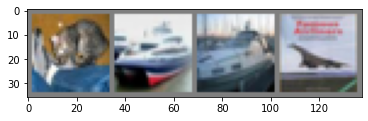

GroundTruth:  cat   ship  ship  plane


In [8]:
dataiter = iter(testloader)
images, labels = dataiter.next()

# print images
imshow(torchvision.utils.make_grid(images))
print('GroundTruth: ', ' '.join(f'{classes[labels[j]]:5s}' for j in range(4)))

In [9]:
net = Net()
net.load_state_dict(torch.load(PATH))

<All keys matched successfully>

In [10]:
outputs = net(images)

In [11]:
_, predicted = torch.max(outputs, 1)

print('Predicted: ', ' '.join(f'{classes[predicted[j]]:5s}'
                              for j in range(4)))

Predicted:  cat   ship  ship  ship 


In [12]:
correct = 0
total = 0
# since we're not training, we don't need to calculate the gradients for our outputs
with torch.no_grad():
    for data in testloader:
        images, labels = data
        # calculate outputs by running images through the network
        outputs = net(images)
        # the class with the highest energy is what we choose as prediction
        _, predicted = torch.max(outputs.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print(f'Accuracy of the network on the 10000 test images: {100 * correct // total} %')

Accuracy of the network on the 10000 test images: 53 %


In [13]:
correct_pred = {classname: 0 for classname in classes}
total_pred = {classname: 0 for classname in classes}


with torch.no_grad():
    for data in testloader:
        images, labels = data
        outputs = net(images)
        _, predictions = torch.max(outputs, 1)
        # collect the correct predictions for each class
        for label, prediction in zip(labels, predictions):
            if label == prediction:
                correct_pred[classes[label]] += 1
            total_pred[classes[label]] += 1


for classname, correct_count in correct_pred.items():
    accuracy = 100 * float(correct_count) / total_pred[classname]
    print(f'Accuracy for class: {classname:5s} is {accuracy:.1f} %')

Accuracy for class: plane is 46.4 %
Accuracy for class: car   is 49.2 %
Accuracy for class: bird  is 36.4 %
Accuracy for class: cat   is 51.7 %
Accuracy for class: deer  is 25.7 %
Accuracy for class: dog   is 27.1 %
Accuracy for class: frog  is 79.7 %
Accuracy for class: horse is 72.3 %
Accuracy for class: ship  is 70.6 %
Accuracy for class: truck is 74.9 %


In [14]:
!pip install tensorflow

In [15]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models

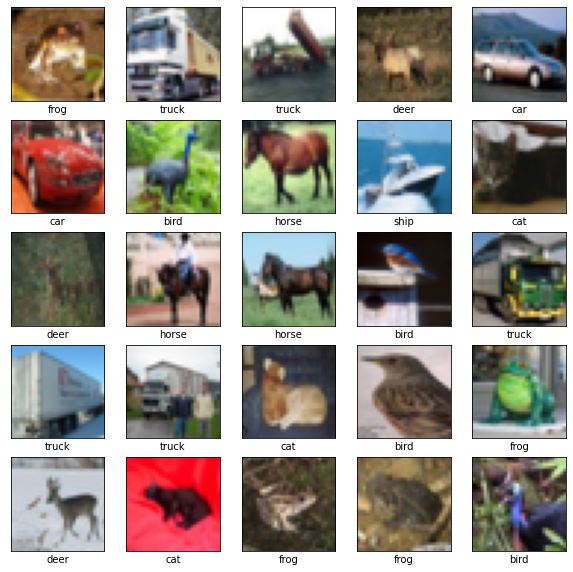

In [16]:
(train_images, train_labels), (test_images, test_labels) = datasets.cifar10.load_data()
train_images, test_images = train_images/255.0, test_images/255.0

class_names = ['plane', 'car', 'bird', 'cat',
           'deer', 'dog', 'frog', 'horse', 'ship', 'truck']

plt.figure(figsize=(10,10))

for i in range(25):

    plt.subplot(5,5,i+1)

    plt.xticks([])

    plt.yticks([])

    plt.grid(False)
    
    plt.imshow(train_images[i], cmap=plt.cm.binary)

    plt.xlabel(class_names[train_labels[i][0]])

plt.show()

In [ ]:
model = tf.keras.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), activation='relu'))

model.add(layers.Dropout(0.2))

model.add(layers.Flatten())

model.add(layers.Dense(64, activation='relu'))

model.add(layers.Dense(10, activation='softmax'))

model.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',

              metrics=['accuracy'])

history = model.fit(train_images, train_labels, epochs=10,

                    validation_data=(test_images, test_labels))

history.history['val_accuracy']

plt.plot(history.history['accuracy'], label='CNN')

plt.xlabel('Epoch')

plt.ylabel('Accuracy')

plt.ylim([0.5, 1])

plt.legend(loc='lower right')

test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print(test_acc)

2022-03-09 11:59:37.841958: I tensorflow/core/platform/cpu_feature_guard.cc:151] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


Epoch 1/10
1563/1563 [==============================] - 27s 17ms/step - loss: 1.5611 - accuracy: 0.4267 - val_loss: 1.4401 - val_accuracy: 0.4688
Epoch 2/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.1969 - accuracy: 0.5723 - val_loss: 1.0856 - val_accuracy: 0.6126
Epoch 3/10
1563/1563 [==============================] - 24s 15ms/step - loss: 1.0478 - accuracy: 0.6301 - val_loss: 0.9894 - val_accuracy: 0.6539
Epoch 4/10
1563/1563 [==============================] - 26s 17ms/step - loss: 0.9517 - accuracy: 0.6660 - val_loss: 0.9168 - val_accuracy: 0.6826
Epoch 5/10
1563/1563 [==============================] - 36s 23ms/step - loss: 0.8876 - accuracy: 0.6884 - val_loss: 0.9087 - val_accuracy: 0.6872
Epoch 6/10
1563/1563 [==============================] - 35s 22ms/step - loss: 0.8287 - accuracy: 0.7072 - val_loss: 0.8331 - val_accuracy: 0.7115
Epoch 7/10
1563/1563 [==============================] - 30s 19ms/step - loss: 0.7881 - accuracy: 0.7228 - val_loss: 0.8304 -

In [ ]:
model1 = tf.keras.Sequential()
model1.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.MaxPooling2D((2, 2)))
model1.add(layers.Conv2D(64, (3, 3), activation='relu'))
model1.add(layers.Dropout(0.2))
#model1.add(layers.Input((32, 32, 3)))
model1.add(layers.Flatten())
model1.add(layers.Dense(512, activation='relu'))
model1.add(layers.Dense(10, activation='softmax'))
model1.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',

              metrics=['accuracy'])
hist1 = model1.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
hist1.history['val_accuracy']
plt.plot(hist1.history['accuracy'], label='1 hidden')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model1.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)


model2 = tf.keras.Sequential()
model2.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.MaxPooling2D((2, 2)))
model2.add(layers.Conv2D(64, (3, 3), activation='relu'))
model2.add(layers.Dropout(0.2))
model2.add(layers.Flatten())
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(512, activation='relu'))
model2.add(layers.Dense(10, activation='softmax'))
model2.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',

              metrics=['accuracy'])
hist2 = model2.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
hist1.history['val_accuracy']
plt.plot(hist2.history['accuracy'], label='2 hidden')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model2.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

model3 = tf.keras.Sequential()
model3.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.MaxPooling2D((2, 2)))
model3.add(layers.Conv2D(64, (3, 3), activation='relu'))
model3.add(layers.Dropout(0.2))
model3.add(layers.Flatten())
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(512, activation='relu'))
model3.add(layers.Dense(10, activation='softmax'))
model3.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',

              metrics=['accuracy'])
hist3 = model3.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
hist1.history['val_accuracy']
plt.plot(hist3.history['accuracy'], label='3 hidden')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model3.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

model4 = tf.keras.Sequential()
model4.add(layers.Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.MaxPooling2D((2, 2)))
model4.add(layers.Conv2D(64, (3, 3), activation='relu'))
model4.add(layers.Dropout(0.2))
model4.add(layers.Flatten())
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(512, activation='relu'))
model4.add(layers.Dense(10, activation='softmax'))
model4.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',

              metrics=['accuracy'])
hist4 = model4.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
hist1.history['val_accuracy']
plt.plot(hist4.history['accuracy'], label='4 hidden')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model4.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)

In [ ]:
model5 = tf.keras.Sequential()
model5.add(layers.Conv2D(32, (3, 3), activation='sigmoid', input_shape=(32, 32, 3)))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model5.add(layers.MaxPooling2D((2, 2)))
model5.add(layers.Conv2D(64, (3, 3), activation='sigmoid'))
model5.add(layers.Dropout(0.2))
model5.add(layers.Flatten())
model5.add(layers.Dense(512, activation='sigmoid'))
model5.add(layers.Dense(512, activation='sigmoid'))
model5.add(layers.Dense(512, activation='sigmoid'))
model5.add(layers.Dense(512, activation='sigmoid'))
model5.add(layers.Dense(10, activation='softmax'))
model5.compile(optimizer='adam',

              loss='sparse_categorical_crossentropy',

              metrics=['accuracy'])
hist5 = model5.fit(train_images, train_labels, epochs=10,
                    validation_data=(test_images, test_labels))
hist1.history['val_accuracy']
plt.plot(hist5.history['accuracy'], label='sigmoid')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
test_loss, test_acc = model5.evaluate(test_images,  test_labels, verbose=2)
print(test_acc)